In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aith-dl-competition-tabular-data/sample_submission.csv
/kaggle/input/aith-dl-competition-tabular-data/train.csv
/kaggle/input/aith-dl-competition-tabular-data/test.csv


In [2]:
data_train = pd.read_csv('/kaggle/input/aith-dl-competition-tabular-data/train.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [3]:
data_test = pd.read_csv('/kaggle/input/aith-dl-competition-tabular-data/test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   height(cm)           10000 non-null  float64
 3   weight(kg)           10000 non-null  float64
 4   waist(cm)            10000 non-null  float64
 5   eyesight(left)       10000 non-null  float64
 6   eyesight(right)      10000 non-null  float64
 7   hearing(left)        10000 non-null  float64
 8   hearing(right)       10000 non-null  float64
 9   systolic             10000 non-null  float64
 10  relaxation           10000 non-null  float64
 11  fasting blood sugar  10000 non-null  float64
 12  Cholesterol          10000 non-null  float64
 13  triglyceride         10000 non-null  float64
 14  HDL                  10000 non-null  float64
 15  LDL                  10000 non-null  

In [4]:
submition = pd.read_csv('/kaggle/input/aith-dl-competition-tabular-data/sample_submission.csv')
submition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   smoking  10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [5]:
data_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,35.0,175.0,75.0,86.5,1.2,1.2,1.0,1.0,127.0,...,58.0,108.0,15.6,1.0,0.9,17.0,14.0,21.0,0.0,0.0
1,1,45.0,155.0,60.0,82.0,1.2,1.0,1.0,1.0,129.0,...,50.0,110.0,14.0,1.0,0.7,22.0,18.0,14.0,0.0,0.0
2,2,35.0,175.0,60.0,74.0,1.2,1.2,1.0,1.0,100.0,...,58.0,116.0,14.8,1.0,0.9,20.0,15.0,16.0,0.0,1.0
3,3,60.0,160.0,55.0,74.0,1.2,1.5,1.0,1.0,139.0,...,73.0,95.0,15.1,1.0,0.7,47.0,31.0,15.0,0.0,0.0
4,4,40.0,160.0,55.0,71.0,0.9,1.2,1.0,1.0,100.0,...,66.0,103.0,13.1,1.0,0.6,24.0,21.0,13.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,65.0,150.0,50.0,72.5,0.8,0.7,1.0,1.0,128.0,...,51.0,159.0,13.2,1.0,0.6,27.0,18.0,13.0,0.0,0.0
14996,14996,45.0,165.0,70.0,85.0,0.9,0.9,1.0,1.0,129.0,...,47.0,122.0,15.8,1.0,0.8,29.0,35.0,49.0,0.0,1.0
14997,14997,40.0,155.0,60.0,83.0,0.8,0.8,1.0,1.0,116.0,...,62.0,112.0,13.6,1.0,0.7,27.0,27.0,43.0,0.0,0.0
14998,14998,40.0,170.0,80.0,89.0,1.2,1.2,1.0,1.0,120.0,...,39.0,117.0,16.3,1.0,1.0,24.0,27.0,51.0,0.0,1.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
columns = [
    'id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
    'hearing(left)', 'hearing(right)', 'systolic', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
    'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'
]

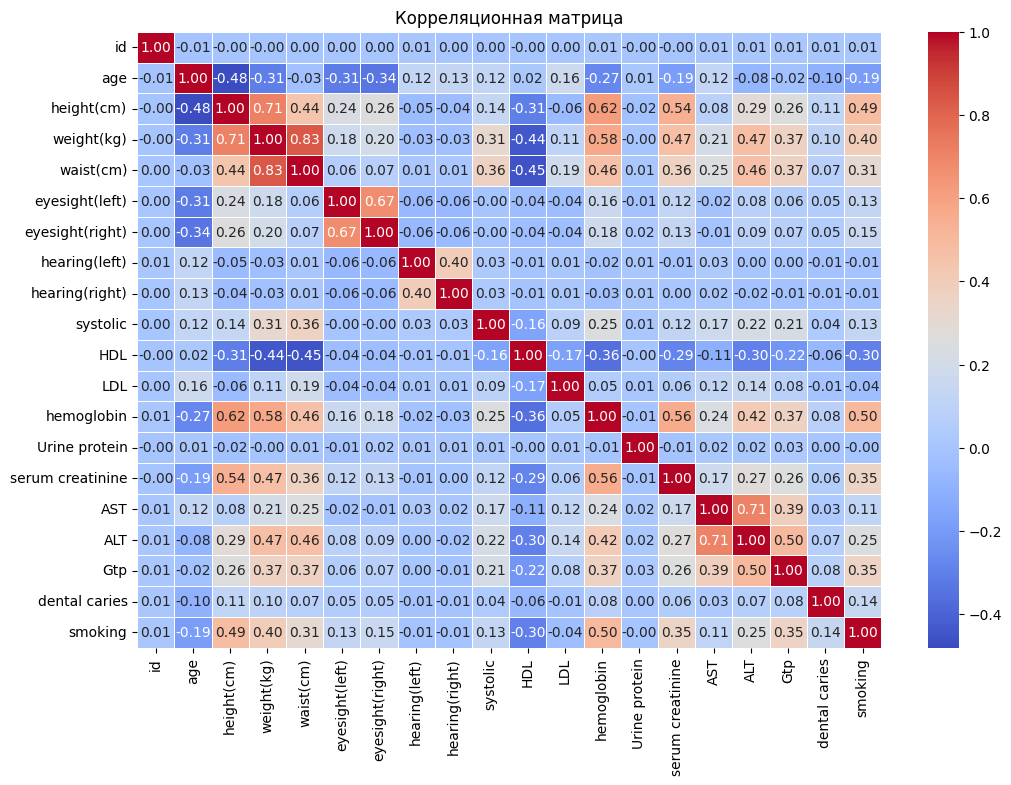

In [8]:
df = pd.DataFrame(data_train, columns=columns)

# Вычисление матрицы корреляции
correlation_matrix = df.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [10]:
X = data_train.drop(columns=['id', 'smoking']).values
y = data_train['smoking'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [12]:
class EnhancedSmokingPredictor(nn.Module):
    def __init__(self):
        super(EnhancedSmokingPredictor, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.output_activation(self.layer4(x))
        return x

# Инициализация модели, функции потерь и оптимизатора
model = EnhancedSmokingPredictor()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Обучение модели
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Оценка модели
with torch.no_grad():
    predictions = model(X_test)
    predictions_rounded = predictions.round()
    accuracy = (predictions_rounded == y_test).float().mean()
    roc_auc = roc_auc_score(y_test.numpy(), predictions.numpy())
    print(f'Accuracy: {accuracy.item():.4f}')
    print(f'ROC-AUC Score: {roc_auc:.4f}')

Epoch [10/200], Loss: 0.6800
Epoch [20/200], Loss: 0.6658
Epoch [30/200], Loss: 0.6464
Epoch [40/200], Loss: 0.6203
Epoch [50/200], Loss: 0.5879
Epoch [60/200], Loss: 0.5519
Epoch [70/200], Loss: 0.5220
Epoch [80/200], Loss: 0.5030
Epoch [90/200], Loss: 0.4874
Epoch [100/200], Loss: 0.4756
Epoch [110/200], Loss: 0.4651
Epoch [120/200], Loss: 0.4593
Epoch [130/200], Loss: 0.4531
Epoch [140/200], Loss: 0.4479
Epoch [150/200], Loss: 0.4427
Epoch [160/200], Loss: 0.4422
Epoch [170/200], Loss: 0.4459
Epoch [180/200], Loss: 0.4342
Epoch [190/200], Loss: 0.4344
Epoch [200/200], Loss: 0.4373
Accuracy: 0.7790
ROC-AUC Score: 0.8636


In [13]:
X_test = data_test.drop(columns=['id']).values
scaler = StandardScaler()
X_t = scaler.fit_transform(X_test)

In [14]:
X_ttest = torch.tensor(X_t, dtype=torch.float32)

In [15]:
with torch.no_grad():
    predictions = model(X_ttest).numpy().flatten()
    predictions_df = pd.DataFrame({'id': id, 'smoking': predictions})
    predictions_df.to_csv('predictions.csv', index=False)
    print('Файл predictions.csv успешно создан.')


Файл predictions.csv успешно создан.
